<a href="https://colab.research.google.com/github/SamarHamdy/Train.csv/blob/main/FinalProj_Samar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import missingno as msno
%matplotlib inline


In [6]:
filename='/content/LoanExport.csv'
Loan_data= pd.read_csv(filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
type(Loan_data)

pandas.core.frame.DataFrame

In [13]:
print(Loan_data.shape)

(291451, 28)


In [14]:
print(Loan_data.columns)

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')


In [15]:
Loan_data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [16]:
#count data types
Loan_data.dtypes.value_counts()

object     14
int64      13
float64     1
dtype: int64

In [18]:
Loan_data.describe()


,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


Abbriviations: 

MSA - Marketing Services Agreements

OCLTV - Combined loan-to-value

LTV - Loan to value

PPM - Private Placement Memorandum

MIP% - Mortgag Insurance Percentage / MIP- Mortgage Insurance Premium

OCLTV - Original Combined Loan to Value

DTI - Debt to Income ratio

OrigUPB - Original Unpaid principal balance

PPM - Prepayment Penalty Mortgage

In [19]:
Loan_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


**Borrower Financial Information:** Credit Score, First_Time_Homebuyer_Flag, original debt-to-income (DTI) ratio, number of borrowers, occupancy status (primary residence, investment or second home)

**Loan Information:** First_Payment (date), Maturity_Date, MI_pert (% mortgage insured), original LTV (loan-to-value) ratio, original combined LTV ratio, original interest rate, original unpaid balance, PPM (prepayment penalty mortgage) flag, loan purpose (purchase vs refinance), original loan term, super-conforming flag

**Property information:** number of units, property type (condo, single-family home, etc.)

**Location: **MSA_Code (Metropolitan statistical area), Property_state, postal_code

**Seller/Servicer information:** channel (retail, broker, etc.), seller name, servicer name

In [20]:
Loan_data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,...,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


Unit refres to number of properties morrtgage

Occupancy values refer to O:owner ,Occupaied ,I:investment Peoperty ,S:secondary home

Channel values refer to  R:retail, B:broker, C:correspondent

Product Type value FRM:fixed rate mortgages


In [21]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

Processing Data

In [22]:
#find/count null values
missing_values=Loan_data.isnull().sum()
print(missing_values)

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64


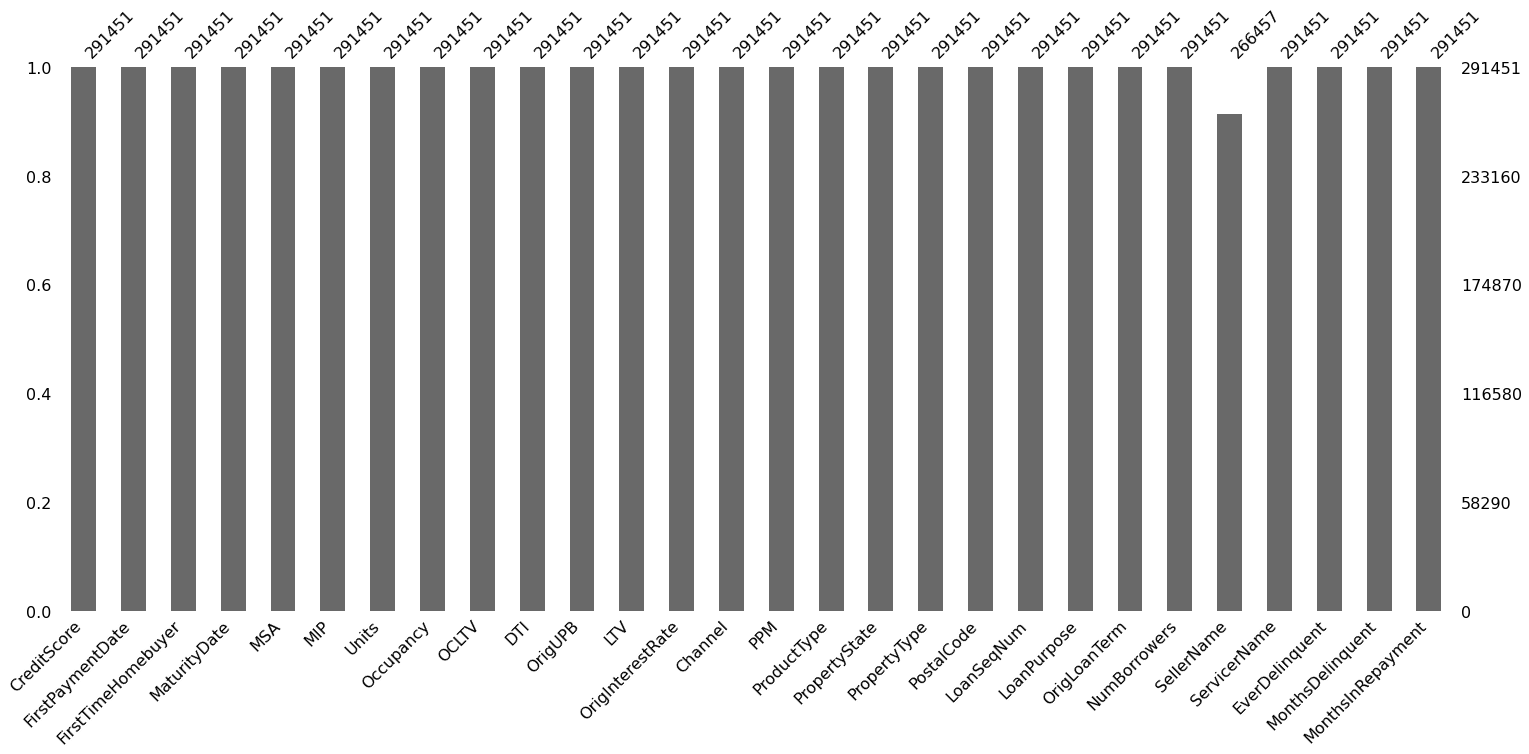

In [23]:
#bar plot showing where is missing values
msno.bar(Loan_data)

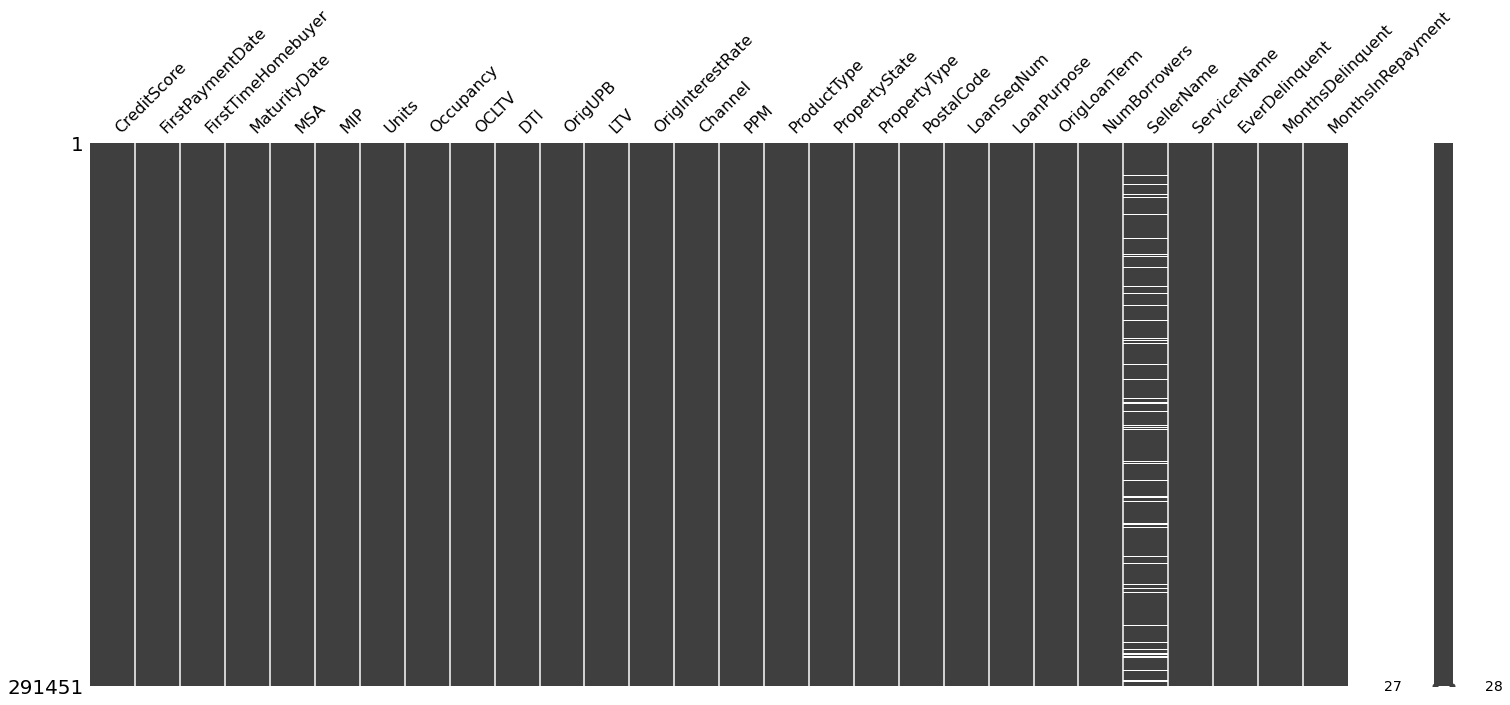

In [24]:
#plot shows position of missing values
msno.matrix(Loan_data)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


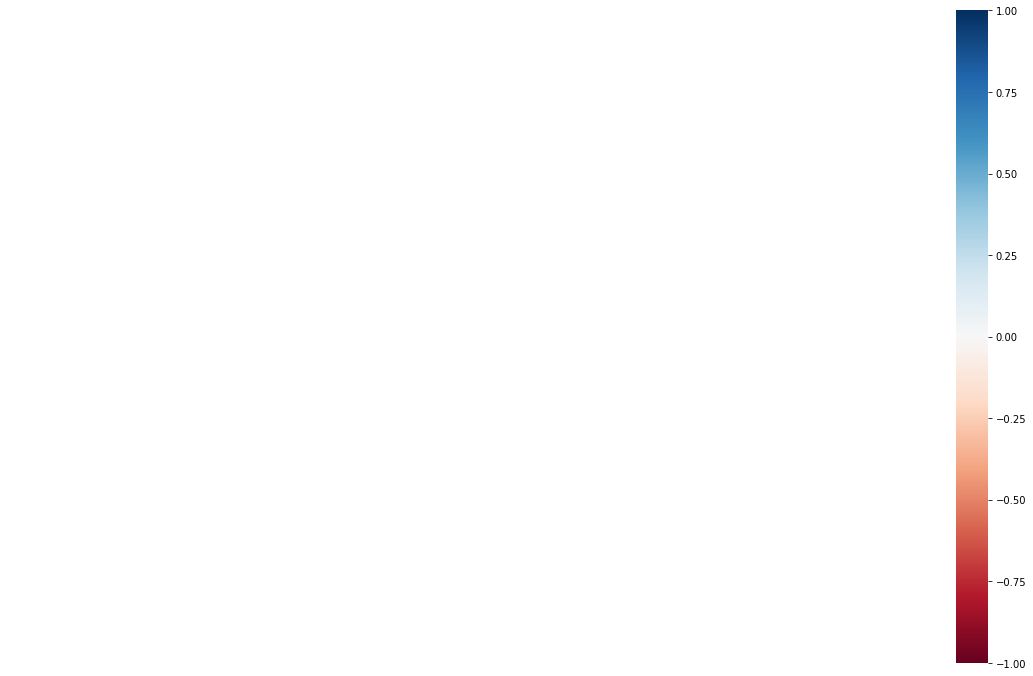

In [33]:
#heatmap shows how miising value is related
msno.heatmap(Loan_data)

In [27]:
#total missing values
total_missing_values= missing_values.sum()
print("total missing values= ", total_missing_values)

#count total cells
total_cells = np.product(Loan_data.shape)
print("total number of cells= ", total_cells)

#percentage of total missing values
total_missing_values_percentage= (total_missing_values/total_cells)*100
print("percent of total missing values= %" ,total_missing_values_percentage)

total missing values=  24994
total number of cells=  8160628
percent of total missing values= % 0.3062754484091175


In [28]:
#drop seller name
Loan_data.drop('SellerName', axis = 1, inplace = True)

In [34]:
#check null values again
Loan_data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [41]:
#filter column by dtype
Loan_data.select_dtypes(include='object').columns

Index(['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM',
       'ProductType', 'PropertyState', 'PropertyType', 'PostalCode',
       'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'ServicerName'],
      dtype='object')

In [44]:
Loan_data.select_dtypes(include='int64').columns

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [50]:
# convert the column contaims Date to datetime format
Loan_data['FirstPaymentDate']= pd.to_datetime(Loan_data['FirstPaymentDate'])

Loan_data['MaturityDate']= pd.to_datetime(Loan_data['MaturityDate'])


In [53]:
Loan_data['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


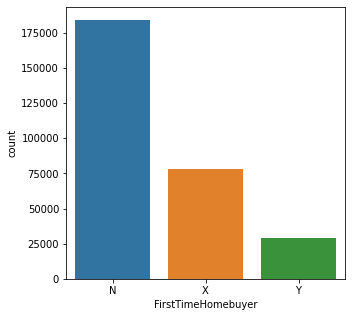

In [55]:
plt.figure(figsize=(5, 5))
sns.countplot(Loan_data.FirstTimeHomebuyer)